<a href="https://colab.research.google.com/github/dalatorrem/Diplomado_Metodos_UCentral_2023/blob/main/Lectura_20_chi2_independencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>

In [ ]:
%%capture
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pingouin

from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")
url_base= "https://raw.githubusercontent.com/lacamposm/Fundamentos_Analitica/main/data/"

## ***Funciones auxiliares***

In [ ]:
def clean_basic_strings(string):
  string = string.strip().lower()
  return string

----
## ***¿Existe influencia del lugar y el día en los delitos cometidos en la ciudad de Chicago?***
---

## ***Objetivos***

Tenemos conocimiento de las pruebas de hipótesis usadas para determinar diferencias estadísticamente significativas. Vamos a revisar el caso entre las características de tipo categórico y para ello haremos uso del test $\chi^2$ en busca de probar formalmente las dependencias entre estas características.

## ***Contexto:***

1. La policía de Chicago quiere un informe sobre patrones delictivos en la ciudad en busca de implementar algunas estrategias basadas en esos hallazgos.

2. Se desea realizar una evaluación de las posibles estrategias de conservación para un bosque protegido en el estado de California.

***¿ Qué se necesita?***

1. Configurar la tabla de contingencia para el tipo de delito frente a la ubicación.

2. Conocer la prueba de $\chi^{2}$ (ji-cuadrado) y aplicarla a este par de variables para determinar la significación estadística de los patrones.

3. Aplicar esta prueba a algunos otros patrones observados.

4. Buscar dar respuesta a la pregunta: ***¿Los patrones delictivos que se observan se deben simplemente al azar o representan una señal procesable?***

In [ ]:
df = pd.read_csv(url_base+'chicago_crimes.csv', index_col='ID')
df.head()

,Primary Type,Location Description,Description,District,Date
ID,,,,,
11192233,Theft Related,Residential & Related,ATTEMPT FORCIBLE ENTRY,17.0,12/31/17 23:58
11196379,Violence & Related,Stores & Related,SIMPLE,19.0,12/31/17 23:50
11192540,Theft Related,Residential & Related,FROM BUILDING,18.0,12/31/17 23:48
11192239,Property Damage,Street & Related,TO VEHICLE,12.0,12/31/17 23:45
11192254,Violence & Related,Residential & Related,AGGRAVATED: HANDGUN,5.0,12/31/17 23:45


#### ***Ejercicio 1.***

Haga una descripción de la información sumunistrada en la tabla.


***Respuesta:***

---

In [ ]:
## Celda para probar.

In [ ]:
## Usamos el ID como identificador del registro.
## Revisar set_index de pandas.
#len(df['ID'].unique())

In [ ]:
## Celda para probar.

In [ ]:
## Cambiamos el tipo de dato a su 'adecuado' tipo.
df['District'] = df['District'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267178 entries, 11192233 to 11255786
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Primary Type          267178 non-null  object  
 1   Location Description  267178 non-null  object  
 2   Description           267178 non-null  object  
 3   District              267177 non-null  category
 4   Date                  267178 non-null  object  
dtypes: category(1), object(4)
memory usage: 10.4+ MB


In [ ]:
## Homogenizamos los strings.
df["Primary Type"] = df["Primary Type"].apply(lambda x: clean_basic_strings(x))
df.groupby("Primary Type").size()

Primary Type
dangerous practices           24074
non-criminal                     37
other offenses                17237
property damage               29487
public peace violation         1498
sexual offenses & related      5973
substances & related          12052
theft related                107433
violence & related            69387
dtype: int64

In [ ]:
## Homogenizamos los strings.
df["Location Description"] = df["Location Description"].apply(lambda x: clean_basic_strings(x))
df.groupby("Location Description").size()

Location Description
airport & related                 1245
bank & related                    2336
colleges & related                5577
goverment buildings & related     3988
hospitals & related               2317
liquor stores & related           2556
other locations                  11327
public transport & related        5330
residential & related            97688
stores & related                 31802
street & related                 97133
vehicles & related                5879
dtype: int64

### ***Ejercicio 2.***

A continuación se muestra la [tabla de contingencia](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) de las categorías agrupadas. ¿Qué conclusiones puedes sacar?


In [ ]:
tabla_contingencia = pd.crosstab(df["Primary Type"], df["Location Description"])
tabla_contingencia

Location Description,airport & related,bank & related,colleges & related,goverment buildings & related,hospitals & related,liquor stores & related,other locations,public transport & related,residential & related,stores & related,street & related,vehicles & related
Primary Type,,,,,,,,,,,,
dangerous practices,252,1536,179,206,142,226,2331,439,9460,3312,5409,582
non-criminal,4,1,0,3,1,1,3,1,13,0,8,2
other offenses,60,25,252,230,150,48,1355,36,9555,831,4431,264
property damage,34,117,334,274,111,99,816,543,12147,1665,12644,703
public peace violation,26,1,137,53,19,4,47,36,258,82,827,8
sexual offenses & related,9,6,280,131,149,33,241,101,3429,112,1363,119
substances & related,60,7,190,692,97,107,149,163,1889,360,7707,631
theft related,620,521,1221,1377,731,1272,4605,2714,28834,21194,41780,2564
violence & related,180,122,2984,1022,917,766,1780,1297,32103,4246,22964,1006


***Respuesta.***

Podemos hacer que muestre *porcentajes* con el argumento `normalize`. Podemos normalizar así:

1. tomando la suma de cada columna y dividiendo los valores de las columnas respectivas por esa suma (`normalize="columns"`); o
2. tomando la suma de cada fila y dividiendo todos los valores de fila respectivos por esa suma (`normalize="index"`)



#### ***Ejemplo 1.***

Para visualizar los datos un poco mejor, obtengamos una tabla de contingencia con el *porcentaje* de delitos que ocurrieron en cada categoría de ubicación.

En particular, la suma de los valores en una sola fila, que es la suma de todos los porcentajes de ubicación para un tipo primario en particular, es 100 %.

Mirando solo los delitos de tipo `Property Damage`, ¿cuál es el lugar más común donde ocurrió este tipo de delito y cuál es su frecuencia relativa porcentual?

In [ ]:
ct_index = pd.crosstab(index=df["Primary Type"], columns=df["Location Description"],
                       normalize="index")*100
#ct_index["Total_index"] = ct_index.sum(axis=1)
ct_index.round(3)

Location Description,airport & related,bank & related,colleges & related,goverment buildings & related,hospitals & related,liquor stores & related,other locations,public transport & related,residential & related,stores & related,street & related,vehicles & related
Primary Type,,,,,,,,,,,,
dangerous practices,1.047,6.380,0.744,0.856,0.590,0.939,9.683,1.824,39.296,13.758,22.468,2.418
non-criminal,10.811,2.703,0.000,8.108,2.703,2.703,8.108,2.703,35.135,0.000,21.622,5.405
other offenses,0.348,0.145,1.462,1.334,0.870,0.278,7.861,0.209,55.433,4.821,25.706,1.532
property damage,0.115,0.397,1.133,0.929,0.376,0.336,2.767,1.841,41.194,5.647,42.880,2.384
public peace violation,1.736,0.067,9.146,3.538,1.268,0.267,3.138,2.403,17.223,5.474,55.207,0.534
sexual offenses & related,0.151,0.100,4.688,2.193,2.495,0.552,4.035,1.691,57.408,1.875,22.819,1.992
substances & related,0.498,0.058,1.577,5.742,0.805,0.888,1.236,1.352,15.674,2.987,63.948,5.236
theft related,0.577,0.485,1.137,1.282,0.680,1.184,4.286,2.526,26.839,19.728,38.889,2.387
violence & related,0.259,0.176,4.301,1.473,1.322,1.104,2.565,1.869,46.267,6.119,33.096,1.450


Tenga en cuenta que multiplicamos toda la tabla por 100 para que las proporciones sean más fáciles de leer (ya que se dan como decimales en lugar de porcentajes de forma predeterminada).

**Respuesta.** La ubicación más común es `Street & Related`. Allí se producen el 42,88% de los delitos del tipo `Property Damage`.

### ***Ejercicio 3.***

Produzca una tabla de contingencia con los porcentajes de los tipos de delitos para cada categoría de ubicación.

In [ ]:
ct_columns = pd.crosstab(index=df["Primary Type"], columns=df["Location Description"],
                         normalize="columns",)*100
#ct_columns.loc["Total_col"] = ct_columns.sum(axis=0)
ct_columns.round(2)

Location Description,airport & related,bank & related,colleges & related,goverment buildings & related,hospitals & related,liquor stores & related,other locations,public transport & related,residential & related,stores & related,street & related,vehicles & related
Primary Type,,,,,,,,,,,,
dangerous practices,20.24,65.75,3.21,5.17,6.13,8.84,20.58,8.24,9.68,10.41,5.57,9.90
non-criminal,0.32,0.04,0.00,0.08,0.04,0.04,0.03,0.02,0.01,0.00,0.01,0.03
other offenses,4.82,1.07,4.52,5.77,6.47,1.88,11.96,0.68,9.78,2.61,4.56,4.49
property damage,2.73,5.01,5.99,6.87,4.79,3.87,7.20,10.19,12.43,5.24,13.02,11.96
public peace violation,2.09,0.04,2.46,1.33,0.82,0.16,0.41,0.68,0.26,0.26,0.85,0.14
sexual offenses & related,0.72,0.26,5.02,3.28,6.43,1.29,2.13,1.89,3.51,0.35,1.40,2.02
substances & related,4.82,0.30,3.41,17.35,4.19,4.19,1.32,3.06,1.93,1.13,7.93,10.73
theft related,49.80,22.30,21.89,34.53,31.55,49.77,40.66,50.92,29.52,66.64,43.01,43.61
violence & related,14.46,5.22,53.51,25.63,39.58,29.97,15.71,24.33,32.86,13.35,23.64,17.11


En esta tabla se puede ver que de todas las infracciones que ocurrieron en los aeropuertos, el 20,24% fueron del tipo `dangerous practices`

## ***Mapas de calor.***

Una buena forma de visualizar tablas de contingencia es con mapas de calor. Para hacer mapas de calor podemos usar el método [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Manteniendo los valores predeterminados, esto es lo que obtenemos:

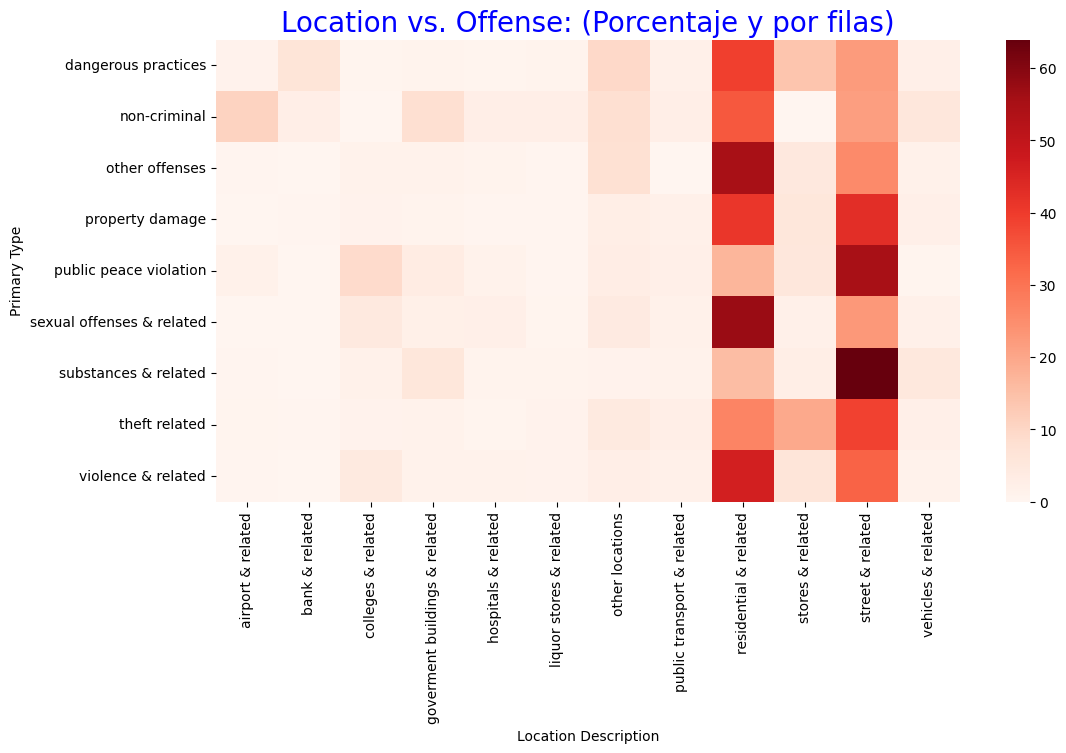

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(ct_index, cmap="Reds",).set_title("Location vs. Offense: (Porcentaje y por filas)",
                                             fontsize=20, color="blue")
plt.show()

Que corresponde a la siguiente tabla de contingenia en `ct_index`.

Vemos que los tonos de color varían mucho entre los diferentes tipos de delitos. Podemos interpretar esta variación como el resultado de interacciones entre el tipo de ubicación y el tipo de delito. Es decir, el tipo de delito influye en cómo se distribuyen esos delitos en diferentes tipos de ubicaciones. Si esta interacción realmente existe, centrarse en un lugar específico solo abordará un subconjunto de delitos. Además, si la policía desea centrarse en un tipo específico de delito (p. ej., robo), no basta con centrarse únicamente en las áreas de mayor delincuencia.

***NOTA: Pensar en la probabilidad condicional nos nuestra una ayuda para entender que sucede, si el TIPO DE DELITO es independiente de la ubicación, la distribución de las ubicaciones dado el delito, sin importar cual sea, debería ser similar.***

In [ ]:
ct_index

Location Description,airport & related,bank & related,colleges & related,goverment buildings & related,hospitals & related,liquor stores & related,other locations,public transport & related,residential & related,stores & related,street & related,vehicles & related
Primary Type,,,,,,,,,,,,
dangerous practices,1.046772,6.380327,0.743541,0.855695,0.589848,0.938772,9.682645,1.823544,39.295506,13.757581,22.468223,2.417546
non-criminal,10.810811,2.702703,0.000000,8.108108,2.702703,2.702703,8.108108,2.702703,35.135135,0.000000,21.621622,5.405405
other offenses,0.348088,0.145037,1.461971,1.334339,0.870221,0.278471,7.860997,0.208853,55.433080,4.821025,25.706329,1.531589
property damage,0.115305,0.396785,1.132703,0.929223,0.376437,0.335741,2.767321,1.841489,41.194425,5.646556,42.879913,2.384101
public peace violation,1.735648,0.066756,9.145527,3.538051,1.268358,0.267023,3.137517,2.403204,17.222964,5.473965,55.206943,0.534045
sexual offenses & related,0.150678,0.100452,4.687762,2.193203,2.494559,0.552486,4.034823,1.690943,57.408338,1.875105,22.819354,1.992299
substances & related,0.497843,0.058082,1.576502,5.741786,0.804846,0.887819,1.236309,1.352473,15.673747,2.987056,63.947892,5.235646
theft related,0.577104,0.484953,1.136522,1.281729,0.680424,1.183994,4.286392,2.526226,26.839053,19.727644,38.889354,2.386604
violence & related,0.259415,0.175825,4.300517,1.472898,1.321573,1.103953,2.565322,1.869226,46.266592,6.119302,33.095537,1.449839


#### ***Ejercicio 4.***

¿Qué conclusiones puedes sacar de la gráfica y la tabla de arriba?

***Respuesta.***

Recuerde que podemos cambiar el guión y construir la tabla con las proporciones de los tipos de delitos para cada categoría de ubicación.

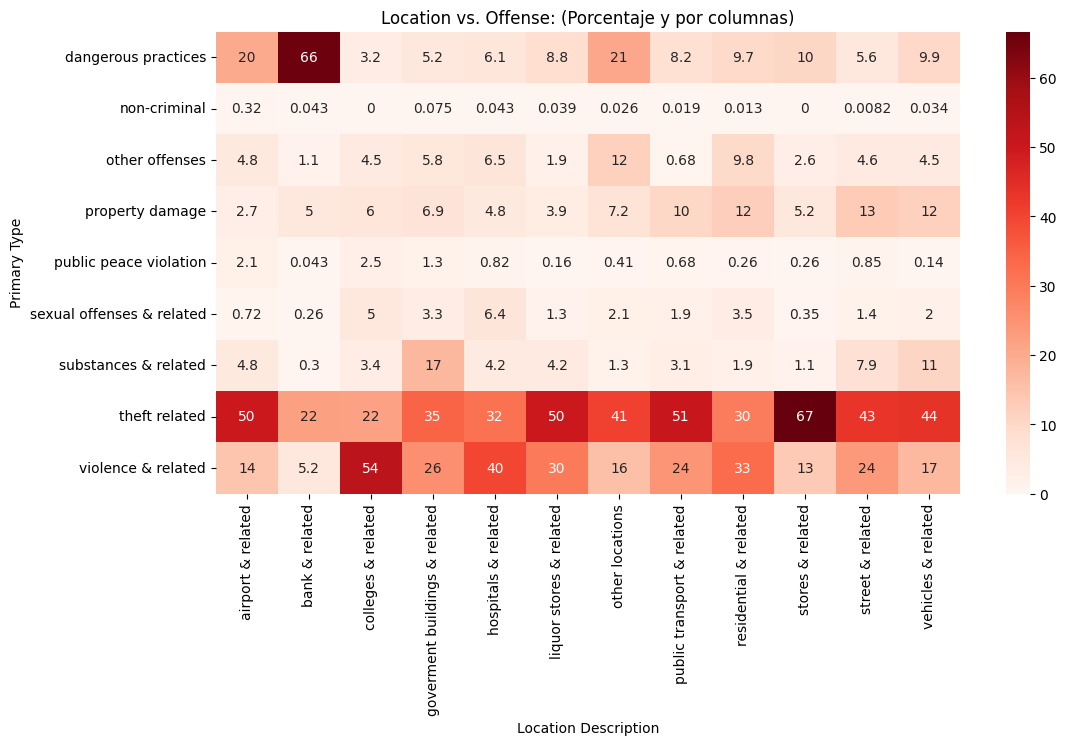

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(ct_columns, cmap="Reds",
            annot=True).set_title("Location vs. Offense: (Porcentaje y por columnas)")
plt.show()

Observe que ambos conjuntos de proporciones puede brindarnos información que no era tan evidente de la tabla de contingecias original.

#### ***Ejercicio 5.***

¿Qué conclusiones puedes sacar del mapa de calor de arriba? ¿Estos resultados aún respaldan una interacción entre `Primary Type` y `Location Description`?

***Respuesta.***

## ***Test $\chi^{2}$ basado en tablas de contingencias.***

Hemos introducido ya, las prueba de hipótesis. Sabemos como hacer una prueba $t$ para comparar la media de una muestra con otro valor buscando determinar diferencias  significativa. Ahora, vamos mediante el siguiente ejemplo entender la lógica con la prueba $\chi^2$ para decidir si dos variables categóricas son independientes entre sí o no.

En `Python` vamos a realizarla con dos librerias: `pingouin` y `scipy`.

#### ***Ejemplo 2:***

Supongamos que una empresa está interesada en analizar si los segmentos de mercado: `Hombres` y `Mujeres` de tres tipos de cerveza: `Ligera`, `Clara` y `Oscura` que produce difieren.

Para esto se recopiló la siguiente información:


In [ ]:
lista1 = 50*["Ligera"] + 70*["Clara"] + 30*["Oscura"]
lista2 = 20*["Hombre"] + 30*["Mujer"] + 40*["Hombre"] + 30*["Mujer"] + 20*["Hombre"] + 10*["Mujer"]

example = pd.DataFrame({"Cerveza_Preferida":lista1,"Género":lista2})
example.sample(5)

,Cerveza_Preferida,Género
32,Ligera,Mujer
138,Oscura,Hombre
10,Ligera,Hombre
80,Clara,Hombre
117,Clara,Mujer


In [ ]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cerveza_Preferida  150 non-null    object
 1   Género             150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [ ]:
for col in example.columns:
  print("Columna:",col,"   Valores únicos:--->",example[col].unique())

Columna: Cerveza_Preferida    Valores únicos:---> ['Ligera' 'Clara' 'Oscura']
Columna: Género    Valores únicos:---> ['Hombre' 'Mujer']


Esta información contiene 150 registros de las preferencia de cerveza y el género de quien responde.

La correspondiente table de contingencias es:

In [ ]:
pd.crosstab(index=example["Género"], columns=example["Cerveza_Preferida"], margins=True,
            margins_name="TOTAL")

Cerveza_Preferida,Clara,Ligera,Oscura,TOTAL
Género,,,,
Hombre,40,20,20,80
Mujer,30,30,10,70
TOTAL,70,50,30,150


Se desea hacer uso de una prueba de independencia para determinar si la preferencia por un tipo de cerveza es independiente del género. Así, vamos a enfrentar las hipótesis:

$$H_{0}: \text{ La preferencia por un tipo de cerveza ES independiente del género del consumidor.}$$

$$VS.$$

$$H_{a}: \text{ La preferencia por un tipo de cerveza NO es independiente del género del consumidor.}$$

Vamos a suponer que $H_{0}$ es verdadera, entonces se ha de obtener la siguiente tabla de contingencias esperada.

***Supongamos que son independientes ($H_{0}$ verdadera).***



$$P(\text{ Hombre$\cap$Clara})=P(Hombre)*P(Clara)$$

Luego:

$$P(Hombre)*P(Clara) = \frac{80}{150}*\frac{70}{150}=0.248888$$


In [ ]:
## El número esperado de hombre que les gusta la cerveza clara.
0.248888*150

37.3332

Si se continua el proceso anterior se obtiene la tabla de contigencias esperada.


In [ ]:
## Tabla esperada bajo el supuesto de independencia, teniendo en cuenta además que
## tenemos una muestra de 150 individuos.
pd.DataFrame({"Clara":[37.33,32.67],"Ligera":[26.66,23.32],"Oscura":[16,14]},
             index=["Hombre", "Mujer"])

,Clara,Ligera,Oscura
Hombre,37.33,26.66,16
Mujer,32.67,23.32,14


Vamos a determinar si lo observado tiene una diferencia significativa con los esperado. Para ello realizamos un test - $\chi^{2}$ de la libreria [pingouin](https://pingouin-stats.org/generated/pingouin.chi2_independence.html)

In [ ]:
## Argumentos: data, x (index), y (columns)
## Output: (tuple) ----> 0.Expected, 1.Observed, 2.Stats
expected, observed, stats = pingouin.chi2_independence(data=example, x='Género',
                                                       y='Cerveza_Preferida')
##
print(' Observado '.center(100,'='))
display(observed)
print(' Esperado '.center(100,'='))
display(expected)
print('='*100)

============================================ Observado =============================================


Cerveza_Preferida,Clara,Ligera,Oscura
Género,,,
Hombre,40,20,20
Mujer,30,30,10


============================================= Esperado =============================================


Cerveza_Preferida,Clara,Ligera,Oscura
Género,,,
Hombre,37.333333,26.666667,16.0
Mujer,32.666667,23.333333,14.0


## ***Simulación situación de independencia.***




In [ ]:
simu1 = 50*["Ligera"] + 70*["Clara"] + 30*["Oscura"]
simu2 = 27*["Hombre"] + 23*["Mujer"] + 37*["Hombre"] + 33*["Mujer"] + 16*["Hombre"] + 14*["Mujer"]
## DataFrame con la tabla esperada.
simulacion = pd.DataFrame({"Cerveza_Preferida":simu1,"Género":simu2})
simulacion.reset_index(drop=True,inplace=True)
simulacion.head(2)

,Cerveza_Preferida,Género
0,Ligera,Hombre
1,Ligera,Hombre


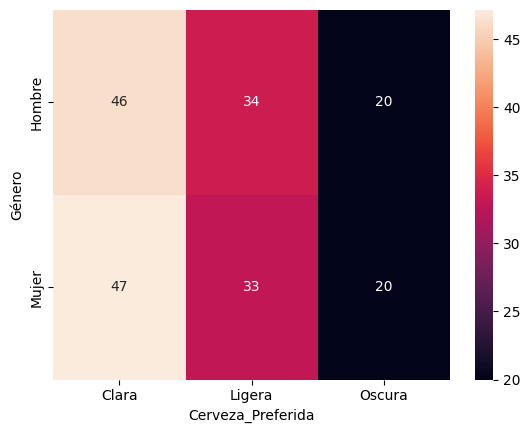

In [ ]:
## Por filas
index = pd.crosstab(simulacion["Género"], simulacion["Cerveza_Preferida"],
                     normalize="index")*100
##
sns.heatmap(index, annot = True)
plt.show()

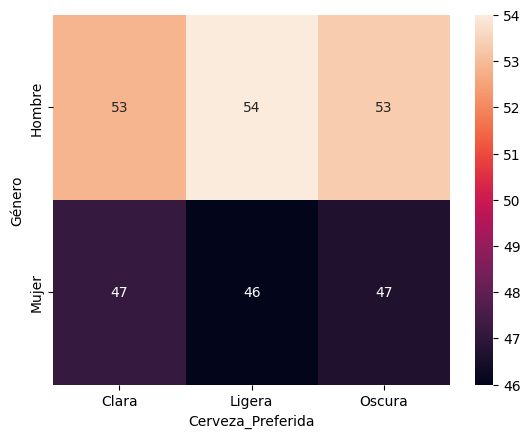

In [ ]:
## Por columnas
column = pd.crosstab(simulacion["Género"], simulacion["Cerveza_Preferida"],
                     normalize="columns")*100
##
sns.heatmap(column, annot = True)
plt.show()

***Note como la distribución de colores en la tabla  esperada tiene comportamientos "similares" en las filas, y en las columnas, es decir en ambos casos las distribuciones tiene similar distribución, esto es un indicio de que tenemos independencia***

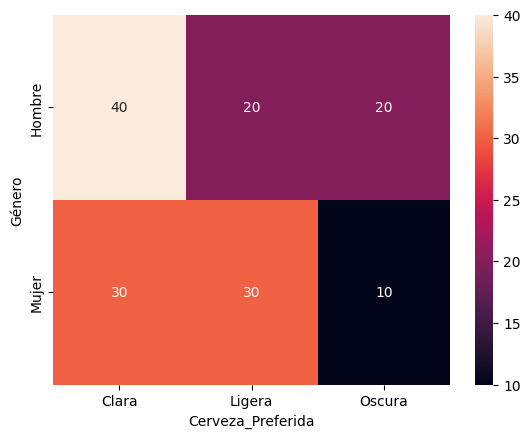

In [ ]:
## Heatmap de lo observado.
sns.heatmap(observed, annot=True)
plt.show()

In [ ]:
stats.loc[0,["chi2","dof","pval"]]

chi2    6.122449
dof          2.0
pval     0.04683
Name: 0, dtype: object

In [ ]:
## Con scipy.
chi2_contingency(observed)[0:2] ## x^2 value y p-valor de la prueba.

(6.122448979591837, 0.046830316852419576)

Dado el $p$-valor, y a una significancia $\alpha=0.05$ se concluye que:

***LA PREFERENCIA POR UN CERVEZA NO ES INDEPENDIENTE DEL GÉNERO DEL CONSUMIDOR***

## ***Retomando el problema comercial...***

Hemos generado la tabla de contingencia de `Primary Type` vs. `Location Description` y observamos que en el  desglose de los tipos de delitos por tipo de ubicación no es uniforme. Pensamos que podría haber una interacción entre estas dos variables. Buscamos de manera formal probar si las variaciones se deben a la aleatoriedad o nuestran diferencias tan marcadas que mostraria su dependencia. Para ello usaremos la prueba $\chi^2$.

Consideramos la hipótesis nula como:
<br>
<center>$H_0$: `Primary Type` es independiente de `Location Description`</center>
<br>

Supongamos que $H_0$ es cierto. Cuando tenemos dos eventos independientes $A$ y $B$, la probabilidad de que ambos sucedan es igual a la probabilidad de $A$ por la probabilidad de $B$:

$$P(A \cap B) = P(A)P(B)$$

Por lo tanto, si `Primary Type` y `Location Description`
 son realmente independientes, la proporción de casos que pertenecen a cualquier celda de la tabla de contingencia debe ser igual a la proporción de casos del respectivo tipo de delito por la proporción de casos del respectivo tipo de ubicación. Por ejemplo, sabemos que de todas las infracciones, el 40,21 % fueron hurtos, y que de todas las infracciones, el 36,56 % sucedieron en espacios residenciales. Por lo tanto, bajo $H_0$ esperaríamos que la proporción de todos los delitos que fueron robos y ocurrieron en residencias fuera $0.402103 \times 0.365629 = 0.1470 = 14.70\%$. Dado que hay 267.178 casos en nuestro conjunto de datos, esperaríamos que $14,70\% \times 267.178 \approx 39.281$ casos caigan en esta categoría.

Podemos repetir el mismo cálculo para todos los tipos de delitos y tipos de ubicación hasta obtener una tabla de contingencia como la siguiente:

In [ ]:
## Output: (tuple) ----> 0.Expected, 1.Observed, 2.Stats
x2_test = pingouin.chi2_independence(data=df, x='Location Description', y='Primary Type')
round(x2_test[0])

Primary Type,dangerous practices,non-criminal,other offenses,property damage,public peace violation,sexual offenses & related,substances & related,theft related,violence & related
Location Description,,,,,,,,,
airport & related,112.0,0.0,80.0,137.0,7.0,28.0,56.0,501.0,323.0
bank & related,210.0,0.0,151.0,258.0,13.0,52.0,105.0,939.0,607.0
colleges & related,503.0,1.0,360.0,616.0,31.0,125.0,252.0,2243.0,1448.0
goverment buildings & related,359.0,1.0,257.0,440.0,22.0,89.0,180.0,1604.0,1036.0
hospitals & related,209.0,0.0,149.0,256.0,13.0,52.0,105.0,932.0,602.0
liquor stores & related,230.0,0.0,165.0,282.0,14.0,57.0,115.0,1028.0,664.0
other locations,1021.0,2.0,731.0,1250.0,64.0,253.0,511.0,4555.0,2942.0
public transport & related,480.0,1.0,344.0,588.0,30.0,119.0,240.0,2143.0,1384.0
residential & related,8802.0,14.0,6302.0,10781.0,548.0,2184.0,4407.0,39281.0,25370.0


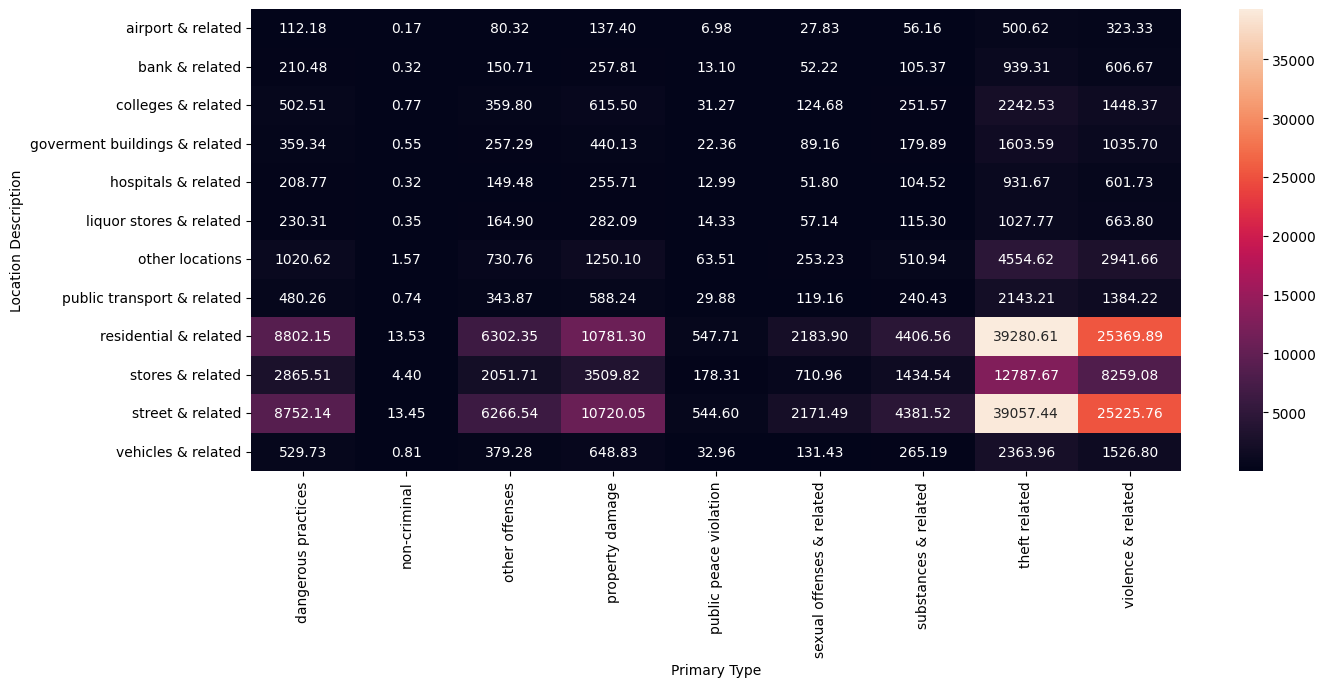

In [ ]:
## Heatmap de lo esperado.
plt.figure(figsize=(15,6))
sns.heatmap(x2_test[0], annot = True, fmt=".2f")
plt.show()

In [ ]:
x2_test[1]

Primary Type,dangerous practices,non-criminal,other offenses,property damage,public peace violation,sexual offenses & related,substances & related,theft related,violence & related
Location Description,,,,,,,,,
airport & related,252,4,60,34,26,9,60,620,180
bank & related,1536,1,25,117,1,6,7,521,122
colleges & related,179,0,252,334,137,280,190,1221,2984
goverment buildings & related,206,3,230,274,53,131,692,1377,1022
hospitals & related,142,1,150,111,19,149,97,731,917
liquor stores & related,226,1,48,99,4,33,107,1272,766
other locations,2331,3,1355,816,47,241,149,4605,1780
public transport & related,439,1,36,543,36,101,163,2714,1297
residential & related,9460,13,9555,12147,258,3429,1889,28834,32103


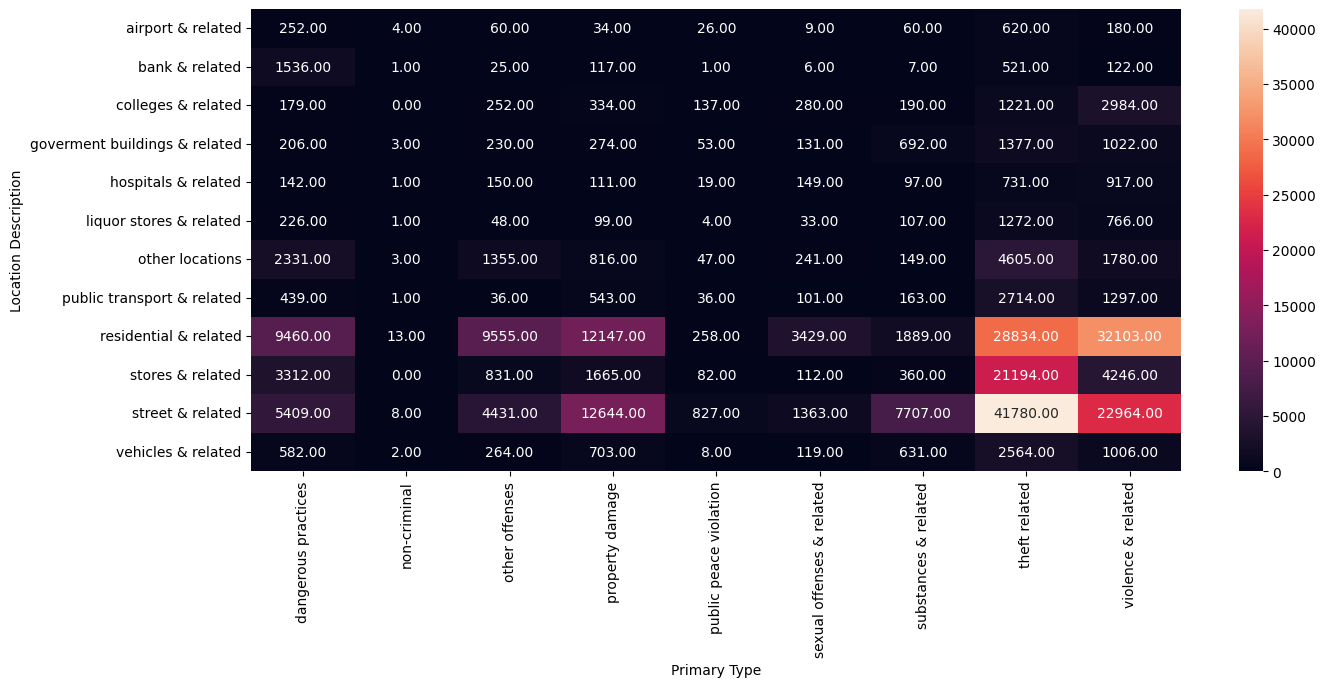

In [ ]:
## Heatmap de lo observado.
plt.figure(figsize=(15,6))
sns.heatmap(x2_test[1], annot = True, fmt=".2f")
plt.show()

In [ ]:
x2_test[2].loc[0,["chi2","dof","pval"]]

chi2    44488.397185
dof             88.0
pval             0.0
Name: 0, dtype: object

Como $p$-valor es menor a $\alpha = 0.05$, se debe rechazar la hipótesis nula, es decir, las varibles son dependientes.

## $\chi^2$ -prueba:  `primary type` vs `dia de la semana`

Podemos hacer uso de los métodos de fecha y hora que proporciona `pandas` para discretizar el tiempo. Primero, convirtamos la columna `Date` al tipo de datos nativo `pandas` `datetime`:

A veces, cuando realizamos la prueba de $\chi²$, una de las variables (o incluso ambas) no es naturalmente categórica (por ejemplo, el tiempo). Sin embargo, podemos *discretizar* dichas variables y realizar la prueba $\chi²$ en las versiones categorizadas. Ahora categorizando la variable de tiempo en días de la semana y deseamos verificar si el día de la semana es independiente de los tipos de delitos. Esta prueba nos dirá si debemos variar el despliegue policial por día de la semana.

In [ ]:
df["date_reformatted"] = pd.to_datetime(df["Date"])
df.head()

,Primary Type,Location Description,Description,District,Date,date_reformatted
ID,,,,,,
11192233,theft related,residential & related,ATTEMPT FORCIBLE ENTRY,17.0,12/31/17 23:58,2017-12-31 23:58:00
11196379,violence & related,stores & related,SIMPLE,19.0,12/31/17 23:50,2017-12-31 23:50:00
11192540,theft related,residential & related,FROM BUILDING,18.0,12/31/17 23:48,2017-12-31 23:48:00
11192239,property damage,street & related,TO VEHICLE,12.0,12/31/17 23:45,2017-12-31 23:45:00
11192254,violence & related,residential & related,AGGRAVATED: HANDGUN,5.0,12/31/17 23:45,2017-12-31 23:45:00


Ahora podemos acceder al día de la semana de cada registro usando el descriptor de acceso `dt` y el atributo `dayofweek`. El lunes se etiqueta como día '0' y el domingo es '6':

In [ ]:
df["date_reformatted"].dt.isocalendar()["day"]

ID
11192233    7
11196379    7
11192540    7
11192239    7
11192254    7
           ..
11035993    7
10942975    7
10942796    7
10801141    7
11255786    7
Name: day, Length: 267178, dtype: UInt32

In [ ]:
df["day_of_week"] = df["date_reformatted"].dt.dayofweek
df["day_of_week"].head()

ID
11192233    6
11196379    6
11192540    6
11192239    6
11192254    6
Name: day_of_week, dtype: int64

Finalmente, podemos crear nuestra tabla de contingencia como de costumbre:

In [ ]:
days = pd.crosstab(df['Primary Type'], df['day_of_week'])
days

day_of_week,0,1,2,3,4,5,6
Primary Type,,,,,,,
dangerous practices,3627,3565,3505,3561,3887,3248,2681
non-criminal,5,6,4,3,11,3,5
other offenses,2486,2586,2554,2459,2568,2273,2311
property damage,4233,4046,3891,3945,4128,4551,4693
public peace violation,199,236,208,200,242,216,197
sexual offenses & related,705,830,829,793,864,866,1086
substances & related,1656,1645,1711,1799,2080,1667,1494
theft related,15463,15207,15251,15411,16524,15341,14236
violence & related,9696,9451,9414,9330,9662,10361,11473


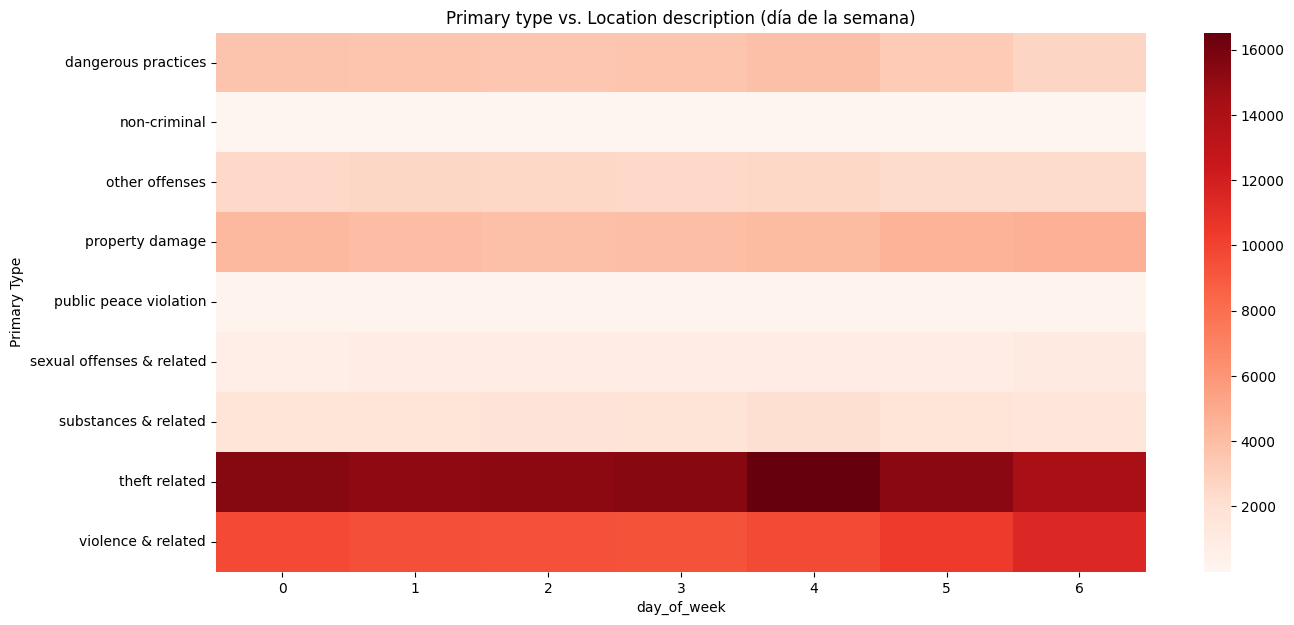

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(days,
            cmap="Reds").set_title("Primary type vs. Location description (día de la semana)")
plt.show()

### ***Ejercicio 5.***

Con solo mirar el mapa de calor, ¿crees que la hipótesis nula se rechazaría o no en una prueba de $\chi^2$?


***Respuesta.***

A continuación la prueba de hipótesis:

In [ ]:
pingouin.chi2_independence(data=df, x='Primary Type',
                           y='day_of_week')[2].loc[0,['chi2','dof','pval']]

chi2    1055.627869
dof            48.0
pval            0.0
Name: 0, dtype: object

In [ ]:
chi2_contingency(days)[0:2]

(1055.6278685200261, 9.935655307138084e-190)

### ***Ejercicio 6.***

Sospechamos que a lo largo de un día típico, la distribución de las ubicaciones de los delitos puede cambiar sustancialmente. Realice:

1. Extraiga la hora del día de la columna `date_reformatted` que se creo. (**Sugerencia:** Para esto, use `dt` y el atributo `hour`)
2. Haga una tabla de contingencia.
3. Realice la tabla de contingencia como un mapa de calor
4. Realice una prueba de $\chi^2$ e informe el valor de $p$.

## ***Conclusiones:***

1. Se observó cómo las tablas de contingencia son útiles para detectar patrones en variables categóricas. En particular, hemos visto que tomar proporciones y usar mapas de calor es útil para comprender mejor los resultados de una tabla de contingencia.

2. Finalmente, hemos aprendido a manejar variables continuas como el tiempo cuando usamos la prueba de chi-cuadrado. Esto se hace mediante la creación de categorías artificiales (pero significativas) que nos permiten implementar la prueba también en estos casos.

## Créditos


"Crimes - 2001 to Present", Chicago Police Department, dataset licensed under the City of Chicago [Terms of Use](https://www.chicago.gov/city/en/narr/foia/data_disclaimer.html), https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2